# HOMEWORK 2 ADM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [2]:
import datatable as dt 

## RQ1 - Exploratory Data Analysis

#### After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

### First dataset: locations.csv

In [3]:
locations = pd.read_csv('~/instagram_locations.csv', delimiter = '\t')

#### Let's have a look on data structure by printing first 10 rows

In [4]:
print(locations.head(20))

       sid                id  \
0   719981   110296492939207   
1   719983         274391278   
2   719985   148885595789195   
3   719987         263258277   
4   326443   406147529857708   
5   326440   242403516699715   
6   719988  1651686855080719   
7   719992         240487083   
8   719996   750669435108256   
9   719998         223283275   
10  720000   470291196648741   
11  720005        1012918773   
12  720010   106138559940320   
13  720012  1037352423133758   
14  720018   502193830174960   
15  720020         266433053   
16  719994   192183691327708   
17  720003         845293065   
18  720008         657798683   
19  720006   460858927655552   

                                                 name  \
0                  Playa de Daimuz - Valencia, España   
1                                         Nová Vieska   
2                                       Everest Today   
3   BULAC - Bibliothèque universitaire des langues...   
4                            ABC Cable Net

#### Columns of dataset

In [12]:
print(len(locations.columns))
locations.columns

23


Index(['sid', 'id', 'name', 'street', 'zip', 'city', 'region', 'cd', 'phone',
       'aj_exact_city_match', 'aj_exact_country_match', 'blurb', 'dir_city_id',
       'dir_city_name', 'dir_city_slug', 'dir_country_id', 'dir_country_name',
       'lat', 'lng', 'primary_alias_on_fb', 'slug', 'website', 'cts'],
      dtype='object')

#### Columns info

Starting the Exploratory Data Analysis from "locations", it's possible to visualize that the observations given in this dataset are analysed considering 23 variables. 

In [32]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

#### Let's have a look on null values 

In [20]:
locations.isna().sum()

sid                             0
id                              0
name                            0
street                     306954
zip                        307079
city                        85492
region                    1020898
cd                          83648
phone                      420970
aj_exact_city_match         22148
aj_exact_country_match      22148
blurb                      615953
dir_city_id                526960
dir_city_name              526960
dir_city_slug              527437
dir_country_id             527030
dir_country_name           526960
lat                          6163
lng                          6163
primary_alias_on_fb        597127
slug                        80990
website                    399396
cts                             0
dtype: int64

The variable with the most non-available values is "region" (the name of the region). Every image has a Sequence ID, Instagrams ID and locations name.

In [21]:
locations.value_counts(normalize = True)

Series([], dtype: float64)

### Second dataset: profiles.csv

In [52]:
instagram_profiles = pd.read_csv('~/instagram_profiles.csv', delimiter='\t')
#instagram_profiles.dropna()

In [25]:
print(len(instagram_profiles.columns))
instagram_profiles.columns

11


Index(['sid', 'profile_id', 'profile_name', 'firstname_lastname',
       'description', 'following', 'followers', 'n_posts', 'url', 'cts',
       'is_business_account'],
      dtype='object')

In [28]:
instagram_profiles.describe().applymap('{:,.2f}'.format)

,sid,profile_id,following,followers,n_posts
count,"4,509,586.00","4,477,139.00","3,452,771.00","3,452,771.00","3,452,771.00"
mean,"2,255,991.72","3,083,301,899.75","1,405.64","4,739.90",409.54
std,"1,301,806.65","42,665,750,578.32","8,113.47","193,908.71","1,041.94"
min,"1,186.00",4.00,0.00,0.00,0.00
25%,"1,128,596.25","273,517,749.00",356.00,159.00,22.00
50%,"2,255,992.50","1,649,248,274.00",754.00,406.00,120.00
75%,"3,383,388.75","5,514,690,705.50","1,573.00",974.00,420.00
max,"4,510,785.00","90,010,129,721,363.00","4,191,080.00","285,457,645.00","183,730.00"


Regarding Instagrams profiles, it's possible to say that, on average, a Istagrams profile is approximately followed by 4700 other profiles and follows 1400 profiles circa, with an average numer of posts approximately equal to 409. In this case mean is not a robust index: there are few instagrams profiles with so many followers such that mean is raised. 75% of instagrams profiles, indeed are followed by less than 1573 profiles and have less than 420 posts. 

In [29]:
instagram_profiles.isna().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

Relevant is the number of non-available observations for the variables "following", "followers" and "n_posts": there are 1056815 profiles with these missing values.  

### Third dataset: posts.csv

In [6]:
instagram_posts = pd.read_csv('~/instagram_posts.csv', delimiter='\t', nrows=500000)

In [9]:
print
instagram_posts.columns

Index(['sid', 'sid_profile', 'post_id', 'profile_id', 'location_id', 'cts',
       'post_type', 'description', 'numbr_likes', 'number_comments'],
      dtype='object')

In [7]:
instagram_posts.describe().applymap('{:,.2f}'.format)

,sid,sid_profile,profile_id,location_id,post_type,numbr_likes,number_comments
count,"500,000.00","500,000.00","500,000.00","499,994.00","500,000.00","500,000.00","500,000.00"
mean,"28,340,422.39","215,508.07","3,004,308,390.97","245,457,275,343,937.56",1.06,325.34,7.69
std,"1,891,547.03","791,453.05","3,479,353,659.77","524,028,692,864,305.56",0.24,"6,068.89",231.95
min,"32,458.00",-1.00,4.00,"1,321.00",1.00,0.00,0.00
25%,"28,482,599.75",-1.00,"282,258,640.00","260,757,081.00",1.00,19.00,0.00
50%,"28,614,360.50",-1.00,"1,522,598,633.00","415,575,863.00",1.00,47.00,1.00
75%,"28,746,630.25",-1.00,"4,831,593,968.00","208,450,099,943,711.00",1.00,126.00,5.00
max,"28,920,014.00","4,510,554.00","14,401,288,185.00","2,974,610,149,231,405.00",3.00,"1,963,123.00","135,221.00"


Even in this case, if you observe the values of the third quartiles and the mean it's possible to conclude that mean is not a robust index: 75% of Instagrams posts have less than 126 likes, while mean is between 300 and 400 likes per post. It means that a few posts get high number of likes, distording means value. 

In [8]:
instagram_posts.isna().sum()

sid                    0
sid_profile            0
post_id                0
profile_id             0
location_id            6
cts                    0
post_type              0
description        41515
numbr_likes            0
number_comments        0
dtype: int64

The only missing values belong to description and location_id variables. 

# Research question 2
### Let's explore the dataset by finding simple insights regarding the profile and posts.

#### - Plot the number of posts for each profile in descending order

In [13]:
data = instagram_profiles.sort_values(['n_posts'], ascending = [False])

<AxesSubplot: xlabel=' profile', ylabel='number_post'>

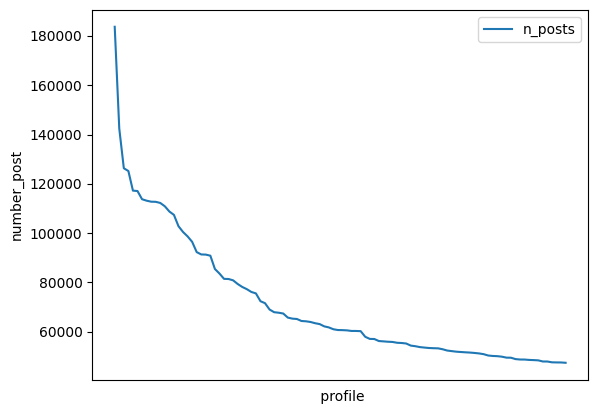

In [18]:
data[:100].plot("profile_name", "n_posts", kind ="line", xticks=[], xlabel =" profile" , ylabel= "number_post")

After creating a dataset with the number of posts per-profile in descending order, it's possible to get plots. The  plot we got was obtained observing the fist 100 profiles for number of posts: each of them has more than 40000 posts, with the first-one that has more than 180000 posts. 

### What posts have the highest number of "likes"?

In [34]:
instagram_posts = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols = ['numbr_likes', 'post_id'])
instagram_posts.sort_values(by='numbr_likes', ascending=False).head(5)


,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745.0


### What posts have the most and the least number of comments?

In [35]:
instagram_posts = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols = ['number_comments', 'post_id'], nrows = 5000)
#instagram_posts['number_comments'].max()
minn = instagram_posts.sort_values(by='number_comments',ascending=True).head(1)
maxn =  instagram_posts.sort_values(by='number_comments',ascending=True).tail(1)
minn 
maxn #post with the most number of comments

,post_id,number_comments
3319,BfrIDlygv1G,1340


### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [4]:
instagram_posts = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols = ['location_id'])

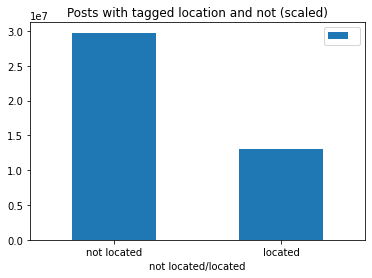

In [5]:
null = instagram_posts['location_id'].isna().sum()
notnull = instagram_posts['location_id'].notna().sum()
df = pd.DataFrame({'not located/located':['not located', 'located'], '':[notnull, null]})
ax = df.plot.bar(x='not located/located', y='',rot =0, title = "Posts with tagged location and not (scaled)"  )
plt.show()

Adding a location to an Instagram photo or video can be useful for letting your followers know where you are, without indicating it in the caption. Looking the chart of the number of posts with tagged / no-tagged location, the number of not located posts is more than twice the one of located posts.

### How many posts include only photos? How many also have videos?


In [43]:
instagram_posts = pd.read_csv('~/instagram_posts.csv', delimiter='\t', usecols = ['post_type'])

first = sum((instagram_posts['post_type'])==1)
second = sum((instagram_posts['post_type'])==2)
third = sum((instagram_posts['post_type'])==3)
print(first, second, third)

41534486 1134768 40943


Posts with only photos are 41534486, while posts with only videos are 1134768. 

### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?


<AxesSubplot:ylabel='is_business_account'>

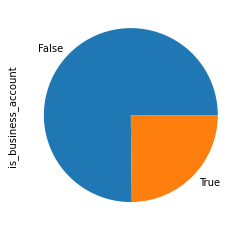

In [209]:
percentage = instagram_profiles.is_business_account.dropna().value_counts(normalize = True)*100
percentage.plot.pie()


The percentage of business accounts is 25%, versus the 75% of non business accounts. Who Needs a Business Instagram Account? Anyone using an Instagram marketing strategy should consider a business account, even if you're only trying to improve your organic reach. In particular, retailers and service providers will benefit from creating an Instagram business account.
This percentge highlights the fact that the most of the people uses Instagram not for working or doesn't have an activity linked to Instagram world. Nowadays there are more users on instagram with a personal account than those with the business account, this probably because working through social networks is still new. In the next few years this percentage will probably change with the increase of "social work".

# Research question 3
### Now it's important to understand the most common times in which users publish their posts

### What is the most common time in which users publish their posts?

After converting 'cts' to a DateTime format and creating a new column for the hours, it's possible to find the most common time in which users publish their posts.  

In [6]:
posts_times = pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['post_id', 'cts'], nrows =500000)
posts_times

,post_id,cts
0,BXdjjUlgcgq,2017-08-06 20:06:57.000
1,BVg0pbolYBC,2017-06-19 09:31:16.000
2,BRgkjcXFp3Q,2017-03-11 20:05:03.000
3,BKTKeNhjEA7,2016-09-13 16:27:16.000
4,8-NQrvoYLX,2015-10-18 10:19:27.000
...,...,...
499995,Bgdrw_sBvq-,2018-03-18 13:01:16.000
499996,BkwJ6u9h1Td,2018-07-03 04:16:38.000
499997,Bx3O0qqBY9v,2019-05-25 01:02:19.000
499998,Bqf4IxQg4vF,2018-11-22 22:41:47.000


In [9]:
# convert 'cts' to a Datetime format
posts_times.cts = pd.to_datetime(posts_times.cts)
posts_times.cts

0        2017-08-06 20:06:57
1        2017-06-19 09:31:16
2        2017-03-11 20:05:03
3        2016-09-13 16:27:16
4        2015-10-18 10:19:27
                 ...        
499995   2018-03-18 13:01:16
499996   2018-07-03 04:16:38
499997   2019-05-25 01:02:19
499998   2018-11-22 22:41:47
499999   2017-06-11 02:34:15
Name: cts, Length: 500000, dtype: datetime64[ns]

In [10]:
# create a new column for the hours
posts_times['hour'] = posts_times.cts.dt.hour
posts_times['hour']

0         20
1          9
2         20
3         16
4         10
          ..
499995    13
499996     4
499997     1
499998    22
499999     2
Name: hour, Length: 500000, dtype: int64

In [11]:
posts_times['hour'].value_counts().idxmax() 

19

We find out that the most common time for publishing photos is 7:00 p.m.

### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.
#### Use the function that you created in the previous literal to plot the number of posts between the following time intervals:


----Initial time    ----Final time
  
    06:00:00	10:59:59
    11:00:00	13:59:59
    14:00:00	16:59:59
    17:00:00	19:59:59
    20:00:00	23:59:59
    00:00:00	02:59:59
    03:00:00	05:59:59

In [12]:
def plot_posts_time(time_intervals):
    results = {}
    for x in slots:
        results[x]= len(posts_times[(posts_times.hour >= x[0]) & (posts_times.hour <= x[1])])
        
    
    # create a list of strings of the time intervals
    intervals = []
    for i in time_intervals:
        intervals.append(str(i))
    
    n_posts = list(results.values())
    plt.bar(range(len(results)), n_posts, tick_label = intervals)
    plt.title('Number of posts for each time interval')
    plt.xlabel('Time intervals')
    plt.ylabel('Number of posts (in millions)')
    plt.show()
    
    

    return(results)

In [13]:
slots = [(6,10),(11,13),(14,16),(17,19),(20,23),(0,2),(3,5)]

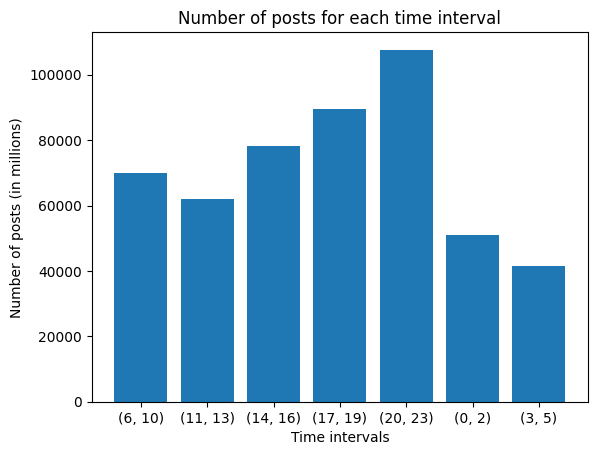

{(6, 10): 70043,
 (11, 13): 62026,
 (14, 16): 78240,
 (17, 19): 89658,
 (20, 23): 107656,
 (0, 2): 50897,
 (3, 5): 41480}

In [14]:
plot_posts_time(slots)

As it's possible to see, 20-23 is the most common interval of time for posting photos, followed by the late-afternoon interval (17-19).

# Research question 4

### Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [20]:
insta_post =pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['profile_id', 'post_id'], nrows =500000)

In [27]:
#def post_profile(profile_id):
def rq4_1(profile):
    return profile, insta_post[insta_post['profile_id']==profile]['post_id']

rq4_1(instagram_profiles['profile_id'][0])
        

(4721049632.0, Series([], Name: post_id, dtype: object))

### Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [51]:
#sort maggior numero di post, prendere head n 
#n profili con maggior numero di post 
def rq4_2(n): 
    return instagram_profiles.sort_values("n_posts", ascending=False).head(n)
    
    


In [56]:
primi = rq4_2(10)
primi 

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
3990313,3661552,1.996648e+08,jasem33312,jasem33312,NaN,2.0,82049.0,183730.0,NaN,2019-06-30 19:14:19.780 -0400,False
2571453,3288809,8.563367e+09,koenigpic,Helperwait Studio,Веб сайты от идеи до запуска,4538.0,675.0,142428.0,vk.com/ru.helperwait,2019-05-07 00:14:06.799 -0400,True
4338921,3970193,1.273455e+09,rudyanto62,Rudyanto 王耀祝,NaN,164.0,1693.0,126340.0,NaN,2019-07-15 10:00:51.171 -0400,False
3942129,3621669,9.813508e+06,hometown_ni,AngelsCowboysLakers,All about live & let live. Peace & Harmony. La...,7488.0,1755.0,125220.0,NaN,2019-06-27 02:49:38.140 -0400,False
4219642,3851869,1.607309e+09,dwfitfiber_thailand,เห็นผลตั้งแต่เซ็ตแรกท้าลอง,✿รับตัวแทนรายได้ดีมาก\n🏧 KTB l SCB l KBANK | B...,7490.0,44951.0,117262.0,bit.ly/2GdIYJl,2019-07-13 02:10:07.317 -0400,True
2207897,345591,1.087614e+09,waxking911,Frank Hernandez,NaN,134.0,138.0,117099.0,NaN,NaN,False
4313908,3944512,1.603890e+09,gamt_official,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่งของแท้💯 มีโปร1290 พร้อมซอง...,7470.0,36001.0,113780.0,bit.ly/2GdIYJl,2019-07-14 21:10:30.785 -0400,True
4219476,3851808,2.181730e+08,collarosedw_official,grapeseed+collarose,🍇 สินค้าแบรนด์ dwplus\n💓 collarose+grapeseed+f...,7496.0,18021.0,113182.0,bit.ly/2asesw7,2019-07-13 02:08:17.407 -0400,True
4236057,3868432,2.855497e+08,gamt_authentic,Official IG Of GAMT Thailand,❥ แว่น gamt พร้อมส่ง มีโปร1290 พร้อมซองแว่น+ผ้...,7480.0,27511.0,112777.0,bit.ly/2T2RIqG,2019-07-13 09:28:30.025 -0400,True
1631526,1312725,8.312603e+09,ivankkkka.trmp,IVANKA DARCEY K. TRUMP,DORA. 👄 #Mango,7497.0,2.0,112723.0,www.flightclub.com/yeezy,2019-04-01 02:41:26.980 -0400,False


### What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [8]:
insta_post2 = pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['profile_id', 'post_id', 'numbr_likes','number_comments' ], nrows =50000)
merge = pd.merge(left = instagram_profiles, right = insta_post2, on= 'profile_id')
dt = merge.sort_values(by = ['n_posts'], ascending = False).head(10)
medialike= np.mean(dt['numbr_likes'])
mediacommenti = np.mean(dt['number_comments'])
print("Media like:    ", medialike)
print("Media commenti:", mediacommenti)

Media like:     438.1
Media commenti: 224.0


The average number of "likes" and comments of the top-10 profiles with the highest number of posts is, respectively, 438.1 likes and 224 comments.  

### Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

In [199]:
profili = pd.read_csv('~/instagram_profiles.csv', delimiter="\t", usecols = ['profile_id', 'n_posts'])
profili = profili.sort_values("n_posts", ascending=False).head(10)
profili

,profile_id,n_posts
3990313,1.996648e+08,183730.0
2571453,8.563367e+09,142428.0
4338921,1.273455e+09,126340.0
3942129,9.813508e+06,125220.0
4219642,1.607309e+09,117262.0
2207897,1.087614e+09,117099.0
4313908,1.603890e+09,113780.0
4219476,2.181730e+08,113182.0
4236057,2.855497e+08,112777.0
1631526,8.312603e+09,112723.0


In [202]:
post3 = pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['profile_id', 'cts'])


In [203]:
post3.cts= pd.to_datetime(post3.cts)

In [204]:
slots = [(6,10),(11,13),(14,16),(17,19),(20,23),(0,2),(3,5)]

199664772.0 0
8563366588.0 0
1273455368.0 0
9813508.0 0
1607309412.0 0
1087613619.0 0
1603889832.0 0
218172998.0 0
285549744.0 0
8312603412.0 0


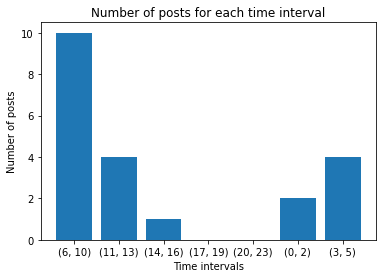

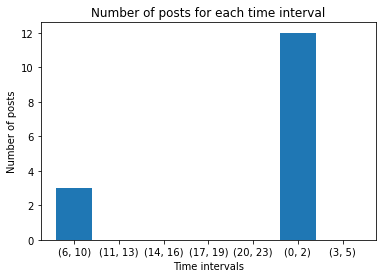

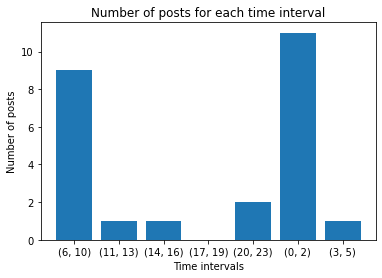

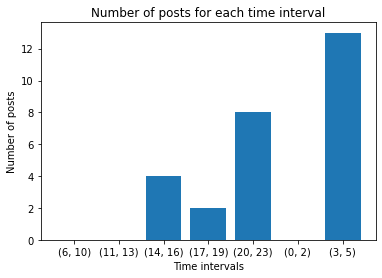

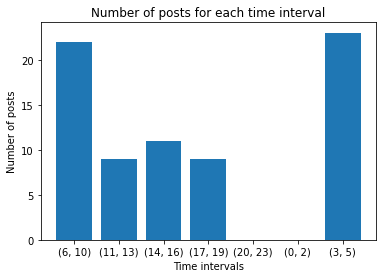

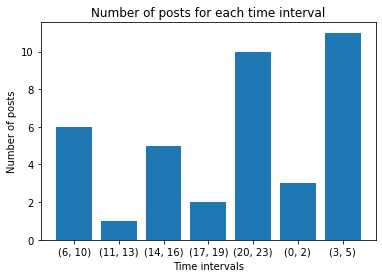

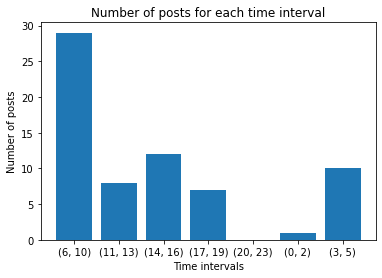

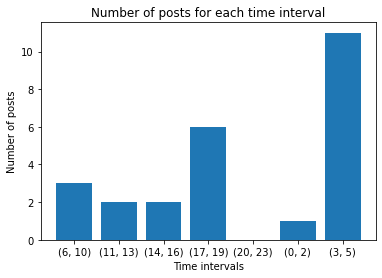

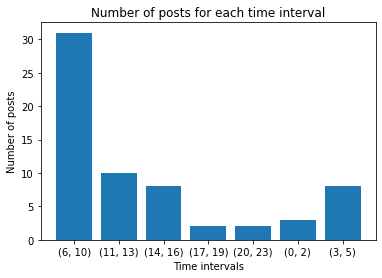

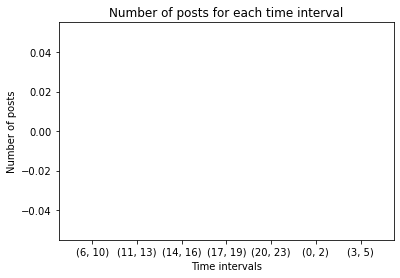

In [205]:
import seaborn as sbn
def f2(time_intervals, hours): 
    results = {}
    for x in time_intervals:
        results[x]= len(hours[(hours >= x[0]) & (hours <= x[1])])
        
        
    
    intervals = []
    for i in time_intervals:
        intervals.append(str(i))
    
    n_posts = list(results.values())
    plt.bar(range(len(time_intervals)), n_posts, tick_label = intervals)
    plt.title('Number of posts for each time interval')
    plt.xlabel('Time intervals')
    plt.ylabel('Number of posts')
    plt.show()
    
    return(results)

for i in profili['profile_id']:
    print(i, len(post3[post3['profile_id']==1].cts))
for i in profili['profile_id']:
    f2(slots, post3[post3['profile_id']==i].cts.dt.hour)
    
    

As it is possible to see in the charts, the most common time-intervalls in which these profiles are used to post are 6-10 intervall, 0-2 and 3-5.

# RQ5

### Plot the top 10 most popular users in terms of followers and their number of posts.

In [53]:
influenti = pd.read_csv('~/instagram_profiles.csv', delimiter="\t", usecols = ['profile_name', 'followers', 'profile_id','n_posts'])
influenti_follower = influenti.sort_values(['followers'], ascending = False).head(10)
influenti_n_post = instagram_profiles.sort_values(['n_posts'], ascending = False).head(10)

In [31]:
influenti_follower['followers']

2880218    285457645.0
2582507     65269440.0
3820939     35339708.0
701965      30689316.0
2414951     30246783.0
2785241     29542143.0
333193      29176804.0
3934581     29042823.0
1311970     26476004.0
1703764     26252169.0
Name: followers, dtype: float64

<BarContainer object of 10 artists>

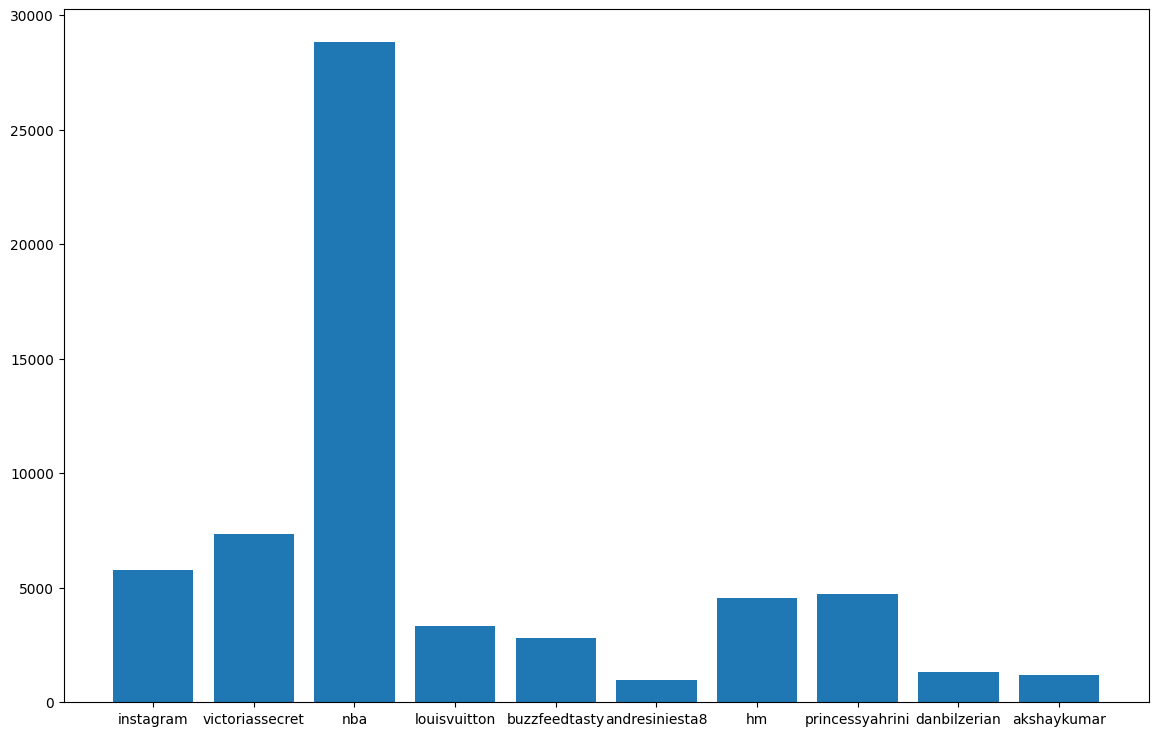

In [30]:
x, y = plt.subplots(figsize = (14,9))
plt.bar(influenti_follower.profile_name,influenti_follower.n_posts)

### Who is the most influential user?

In [54]:
influenti_follower.head(1)

,profile_id,profile_name,followers,n_posts
2880218,25025320.0,instagram,285457645.0,5760.0


### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited.

In [7]:
insta_post3 = pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['profile_id', 'location_id'])
insta_post3

,profile_id,location_id
0,2.237948e+09,1.022366e+15
1,5.579335e+09,4.574268e+14
2,3.134296e+08,4.574268e+14
3,1.837593e+09,4.574268e+14
4,1.131527e+09,4.574268e+14
...,...,...
42710192,5.556457e+09,4.574268e+14
42710193,3.371865e+08,4.574268e+14
42710194,3.289886e+09,4.574268e+14
42710195,8.536366e+09,4.267235e+06


In [8]:
merge2 = pd.merge(left = influenti_follower, right = insta_post3, on= 'profile_id')
merge2

,profile_id,profile_name,followers,location_id
0,25025320.0,instagram,285457645.0,5.332856e+06
1,25025320.0,instagram,285457645.0,5.873874e+08
2,25025320.0,instagram,285457645.0,8.770667e+14
3,25025320.0,instagram,285457645.0,3.500213e+08
4,25025320.0,instagram,285457645.0,5.243120e+08
...,...,...,...,...
136,907025384.0,akshaykumar,26252169.0,NaN
137,907025384.0,akshaykumar,26252169.0,NaN
138,907025384.0,akshaykumar,26252169.0,NaN
139,907025384.0,akshaykumar,26252169.0,NaN


In [33]:
merge4 = merge2.groupby(merge2.columns.tolist()).size().reset_index().\
   rename(columns={0:'location_duplicate'}).sort_values(['location_duplicate'],ascending=False)
merge4 

,profile_id,profile_name,followers,location_id,location_duplicate
29,2.423993e+07,princessyahrini,29042823.0,2.130118e+08,9
88,4.968651e+08,andresiniesta8,29542143.0,3.669021e+08,3
42,2.423993e+07,princessyahrini,29042823.0,1.906910e+15,2
85,5.041706e+07,danbilzerian,26476004.0,1.731498e+15,2
19,2.082449e+07,nba,35339708.0,1.027474e+09,2
...,...,...,...,...,...
30,2.423993e+07,princessyahrini,29042823.0,2.140295e+08,1
28,2.423993e+07,princessyahrini,29042823.0,6.975204e+07,1
27,2.423993e+07,princessyahrini,29042823.0,3.108364e+06,1
26,2.423993e+07,princessyahrini,29042823.0,2.550090e+05,1


In [37]:
city =pd.read_csv('~/instagram_locations.csv', delimiter="\t", usecols = ['id', 'city'])
city

,id,city
0,110296492939207,NaN
1,274391278,Nová Vieska
2,148885595789195,"Kathmandu, Nepal"
3,263258277,"Paris, France"
4,406147529857708,"Burbank, California"
...,...,...
1022653,873926439475785,"Santa Cruz de la Sierra, Bolivia"
1022654,390707529,NaN
1022655,1205466612894741,"Orland Park, Illinois"
1022656,286794844,"Wellington, New Zealand"


In [39]:
city2=city.rename(columns={"id": "location_id"})

In [40]:
merge5 = pd.merge(left = merge4, right = city2, on= 'location_id')

In [49]:
most_visited=merge5.head(4)
most_visited

,profile_id,profile_name,followers,location_id,location_duplicate,city
0,24239929.0,princessyahrini,29042823.0,2.130118e+08,9,"Sydney, Australia"
1,496865116.0,andresiniesta8,29542143.0,3.669021e+08,3,"Kobe-shi, Hyogo, Japan"
2,24239929.0,princessyahrini,29042823.0,1.906910e+15,2,"Vaitape, French Polynesia"
3,50417061.0,danbilzerian,26476004.0,1.731498e+15,2,"Los Angeles, California"


<BarContainer object of 4 artists>

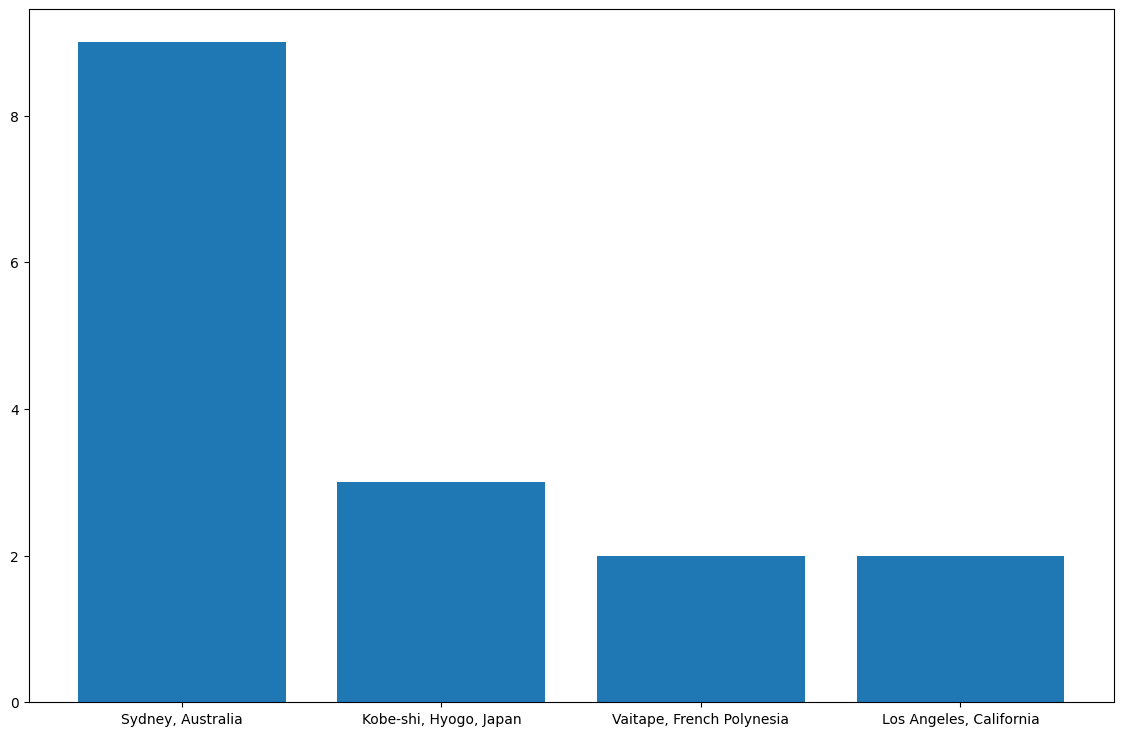

In [50]:
x, y = plt.subplots(figsize = (14,9))
plt.bar(most_visited.city,most_visited.location_duplicate)

Among the most influential users, Sydney is the most visited location. It makes sense plotting only the top-4 most visited locations because all the other locations in the top-10 have been visited only once.

### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [49]:
insta_type = pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['profile_id', 'post_type'])

In [55]:
merge_type = insta_type.loc[insta_type['profile_id'].isin(influenti_follower['profile_id']), ['profile_id', 'post_type'] ]
merge_type

,profile_id,post_type
266570,25025320.0,1
659635,25025320.0,1
1441841,25025320.0,1
1559527,20824486.0,1
2410579,25025320.0,1
...,...,...
41532427,25025320.0,1
41608204,25025320.0,1
41874115,20824486.0,1
42211393,20824486.0,2


In [198]:
first1 = sum((merge_type['post_type'])==1)
second1 = sum((merge_type['post_type'])==2)
third1 = sum((merge_type['post_type'])==3)
print(first1, second1, third1)

128 13 0


In [14]:
tot = first1 +second1+third1
tot

141

In [20]:
print("Percentage only photos:   ",round(100*first1/tot,5) ,"%")
print("Percentage only videos:  ",round(100*second1/tot,5) ,"%" )
print("Percentage photos + videos: ",round(100*third1/tot,5) ,"%" )

Percentage only photos:    90.78014 %
Percentage only videos:   9.21986 %
Percentage photos + videos:  0.0 %


Among the top 10 most popular users, pictures-only posts are 90.78% of the total, 9.22% are only-videos posts. There are no posts with both types together. This result could be motivated by the impact of photos versus videos: photos are quicker to be seen, and since we are considering the top 10 most popular users, this could be a marketing strategy. The fact that there are no posts with both photos and videos could be motivated by the necessity to create "more contents": for them could be better to have two posts, one with photos and one with videos, instead of only one with both.

### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [48]:
insta_likes = pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['numbr_likes', 'profile_id', 'number_comments'])

In [56]:
merge_likes = pd.merge(left = merge_type, right = insta_likes, on= 'profile_id')
merge_likes

,profile_id,post_type,numbr_likes,number_comments
0,25025320.0,1,125428.0,1240.0
1,25025320.0,1,669786.0,4818.0
2,25025320.0,1,1914299.0,20065.0
3,25025320.0,1,840588.0,3627.0
4,25025320.0,1,385494.0,5664.0
...,...,...,...,...
2912,496865116.0,1,283998.0,847.0
2913,496865116.0,1,263077.0,389.0
2914,496865116.0,1,635349.0,2484.0
2915,496865116.0,1,969373.0,7658.0


In [58]:
like1 = merge_likes.groupby(['post_type']).sum(['numbr_likes', 'number_comments'])
print("Total number of likes and comments when post_type = 1 \nand post_type = 2 \n")
like1.drop(['profile_id'], axis =1)

Total number of likes and comments when post_type = 1 
and post_type = 2 



,numbr_likes,number_comments
post_type,,
1,1.519970e+09,11240432.0
2,1.240385e+08,838639.0


In [59]:

like2 = merge_likes.groupby(['post_type']).mean(['numbr_likes', 'number_comments']).round()
like2.drop(['profile_id'], axis =1)



,numbr_likes,number_comments
post_type,,
1,577277.0,4269.0
2,436755.0,2953.0


In [60]:
influenti_follower['followers']

2880218    285457645.0
2582507     65269440.0
3820939     35339708.0
701965      30689316.0
2414951     30246783.0
2785241     29542143.0
333193      29176804.0
3934581     29042823.0
1311970     26476004.0
1703764     26252169.0
Name: followers, dtype: float64

In [61]:
np.mean(influenti_follower['followers'])

58749283.5

Comparing the average number of likes and comments with their followers amount, we can conclude that the average number of likes and comments doesn't exceed respectively the 0.98% and the 0.74% of the average number of followers.

# RQ6

### What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

In [6]:
postrq6 = pd.read_csv('~/instagram_posts.csv', delimiter="\t",usecols=['profile_id', 'cts'], nrows = 10000000)

In [7]:
timerq6 = pd.DataFrame(postrq6[['profile_id', 'cts']])
timerq6[['cts']]  = timerq6[['cts']].apply(pd.to_datetime)
timerq6.sort_values(by = ['cts'])

,profile_id,cts
7017555,4.000000e+00,2010-07-24 03:18:08
4225968,3.000000e+00,2010-08-21 06:40:27
1939650,3.000000e+00,2010-09-05 21:48:24
6933182,1.018000e+03,2010-10-17 19:28:18
6477781,1.900000e+01,2010-10-23 20:41:29
...,...,...
9999537,2.037050e+08,2019-07-07 10:08:31
9999939,2.137618e+08,2019-07-07 10:13:39
9999376,5.073716e+07,2019-07-07 10:16:00
9999243,2.042877e+09,2019-07-07 10:37:52


In [8]:
timerq6['cts_after'] = timerq6.groupby('profile_id').cts.shift(-1) # function Shift index by desired number of periods with an optional time freq.
timerq6['cts mean'] = timerq6['cts_after'] - timerq6['cts']
mean_time = timerq6['cts mean'].mean()
print ("Average time a user lets pass before publishing another post:", mean_time)

Average time a user lets pass before publishing another post: 1 days 10:10:06.004444742


This is not the true mean because we read only 10000000 nrows of dataframe due to parser error. With the entire dataframe the mean should be 33 days. 


In [34]:
profilesrq6 = pd.read_csv('~/instagram_profiles.csv', delimiter="\t", usecols =['profile_id', 'following', 'followers'])

In [35]:
timerq6 = timerq6.sort_values(by='cts mean')

In [36]:
timerq6 = pd.concat([timerq6,profilesrq6 ], ignore_index = True, sort=False)

In [38]:
publication = timerq6.loc[timerq6['cts mean'] != timedelta(days =0 , minutes=0, seconds=0), 'profile_id']
publication = publication.value_counts().head(3)
publication

1.287812e+10    586
1.347814e+10    555
1.296135e+10    520
Name: profile_id, dtype: int64

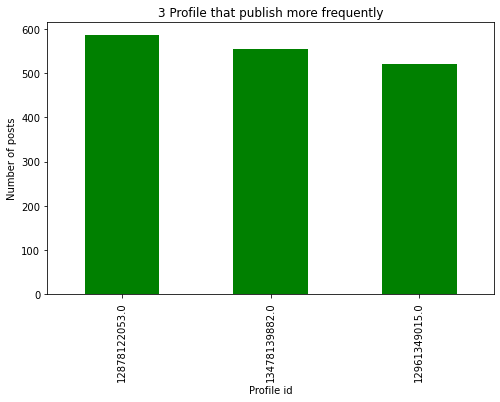

In [43]:
import seaborn as sn 
publication.plot.bar(figsize = (8,5), color = 'green', zorder = 3)
plt.xlabel("Profile id")
plt.ylabel("Number of posts")
plt.title("3 Profile that publish more frequently")
plt.show()


### Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

In [45]:
postrq62 = pd.read_csv('~/instagram_posts.csv', delimiter="\t",usecols=['cts', 'numbr_likes', 'number_comments', 'profile_id'])

In [47]:
slots = [(6,10),(11,13),(14,16),(17,19),(20,23),(0,2),(3,5)]

In [48]:
postrq62['cts']=pd.DatetimeIndex(postrq62['cts']).hour 


In [75]:
def time_like(data, time, slots): 
    results = {}
    for i in slots:
        result = (data[(time >= i[0]) & (time < i[1])]).mean()
        results[str(i)] = result
    
    intervals = []
    for i in slots:
        intervals.append(str(i))
        
        
    plt.subplots(figsize =(8,5))
    plt.bar(range(len(slots)), results.values(), tick_label = intervals, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
    plt.title('Average number of likes for each time interval')
    plt.xlabel('Time intervals')
    plt.ylabel('Average number of likes')
    plt.show()



    

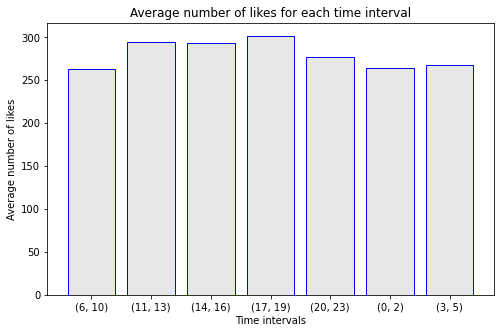

In [76]:
time_like(postrq62.numbr_likes, postrq62.cts, slots)

In [73]:
def time_comments(data, time, slots): 
    results = {}
    for i in slots:
        result = (data[(time >= i[0]) & (time < i[1])]).mean()
        results[str(i)] = result
    
    intervals = []
    for i in slots:
        intervals.append(str(i))
        
        
    plt.subplots(figsize =(8,5))
    plt.bar(range(len(slots)), results.values(), tick_label = intervals, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='green')
    plt.title('Average number of comments for each time interval')
    plt.xlabel('Time intervals')
    plt.ylabel('Average number of comments')
    plt.show()


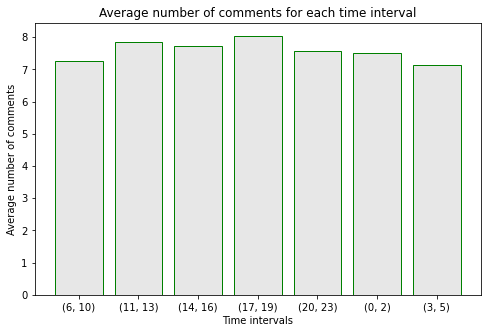

In [74]:
time_comments(postrq62.number_comments, postrq62.cts, slots)

# RQ7

### What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

In [211]:
profiles= pd.read_csv('~/instagram_profiles.csv', delimiter="\t", usecols = ['followers','sid'])

In [212]:

p=[]
for chunk in pd.read_csv('~/instagram_posts.csv', usecols= ['numbr_likes' , 'profile_id'], sep='\t', iterator=True, chunksize=500000, nrows=8000000):
    a=pd.merge(chunk, profiles, on='profile_id')
    prob=sum(a['numbr_likes']>=a['followers']*0.2)/len(a)
    p.append(prob)
sum(p)/len(p)


0.05456789078020011

Using the frequentist definition of probability for the first 8.000.000 rows (our computers return MemoryError for a bigger number of rows) it comes out that the probability a post receives more than 20% 'likes' of the number of followers a user has it's about 5.46%.

### Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

In [213]:
p=[]
for chunk in pd.read_csv('~/instagram_posts.csv', usecols= ['location_id' , 'profile_id'], sep='\t', iterator=True, chunksize=500000, nrows=10000000):
    dups = sum(chunk.pivot_table(index = ['profile_id', 'location_id'], aggfunc ='size')>1)
    prob=dups/len(chunk.pivot_table(index = ['profile_id', 'location_id'], aggfunc ='size'))
    p.append(prob)
sum(p)/len(p)

0.1170444739780345

In our opinion that probability isn't complete because not every user that returns to a site after having posted it in the past posts it again, so there could be missing data to evaluate if an user goes back to a site.

# RQ8

### Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.


In [24]:
dataset_partial= pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['numbr_likes', 'number_comments', 'profile_id'], nrows=50000)

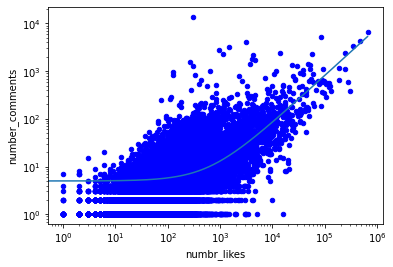

In [30]:
x= dataset_partial['numbr_likes']
y= dataset_partial['number_comments']
ds = dataset_partial.plot.scatter(x= 'numbr_likes', y= 'number_comments', s=None, c=None , color= 'blue' )
ds.set(xscale="log", yscale="log")
#plt.figure(figsize= (25,10), facecolor = 'w')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))


As it is possible to see in the Scatter Plot, we can affirm that more "likes" also mean more comments just for the most popular posts. Except for them, "common" posts receive a number of comments in a wide range, almost without dependence from the number of likes. Noteworthy is the presence of zero-comments posts, which is a mix of posts with enabled comments and posts without comments despite the comments abilitation. 

### Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

In [215]:
time_post = pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['cts', 'numbr_likes', 'number_comments', 'profile_id'], nrows =500000)



In [217]:
time_post_melt = pd.melt(time_post.reset_index(), id_vars=['index'], value_vars= ['cts', 'numbr_likes', 'number_comments'])

time_post_melt.columns =['index', 'treatments', 'value']

### What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.

#### Frequency table

In [20]:
instagram_profiles.followers.dropna()
categoria = instagram_profiles.followers.value_counts()

In [21]:
tabella= pd.DataFrame(categoria)
tabella.columns=['Frequenza assoluta']
tabella.head()

,Frequenza assoluta
0.0,22115
1.0,9071
50.0,6557
49.0,6465
51.0,6382


In [22]:
tabella["Frequenza relativa"]= instagram_profiles.followers.value_counts(normalize = True)
tabella.head()

,Frequenza assoluta,Frequenza relativa
0.0,22115,0.006405
1.0,9071,0.002627
50.0,6557,0.001899
49.0,6465,0.001872
51.0,6382,0.001848


#### Percentage calcolus

In [23]:
followersPercent =  instagram_profiles.followers.value_counts(normalize = True).mul(100).round(1).astype(str) + '%'
followersPercent

0.0         0.6%
1.0         0.3%
50.0        0.2%
49.0        0.2%
51.0        0.2%
            ... 
39896.0     0.0%
117237.0    0.0%
152125.0    0.0%
55822.0     0.0%
93956.0     0.0%
Name: followers, Length: 68935, dtype: object

In [24]:
tabella["Followers%"] = followersPercent
tabella.head()

,Frequenza assoluta,Frequenza relativa,Followers%
0.0,22115,0.006405,0.6%
1.0,9071,0.002627,0.3%
50.0,6557,0.001899,0.2%
49.0,6465,0.001872,0.2%
51.0,6382,0.001848,0.2%


cumulata

In [25]:
tabella["Cumulata"]= tabella["Frequenza relativa"].cumsum()
tabella["Cumulata%"] = tabella["Cumulata"].mul(100).round(1).astype(str)+'%'
tabella.head()

,Frequenza assoluta,Frequenza relativa,Followers%,Cumulata,Cumulata%
0.0,22115,0.006405,0.6%,0.006405,0.6%
1.0,9071,0.002627,0.3%,0.009032,0.9%
50.0,6557,0.001899,0.2%,0.010931,1.1%
49.0,6465,0.001872,0.2%,0.012804,1.3%
51.0,6382,0.001848,0.2%,0.014652,1.5%


#### Mean, mode, and quantiles.

In [26]:
mean = instagram_profiles.followers.mean()
print("Followers mean", round(mean,3))

Followers mean 4739.899


In [27]:
mode = instagram_profiles.followers.mode()
print("Followers mode", mode)

Followers mode 0    0.0
Name: followers, dtype: float64


In [28]:
quantile = instagram_profiles.followers.quantile()
print("Followers quantile", quantile)

Followers quantile 406.0


In [82]:
import seaborn as sb
prof = pd.read_csv('~/instagram_profiles.csv', delimiter="\t", usecols= ['followers'])


<AxesSubplot:xlabel='followers', ylabel='Count'>

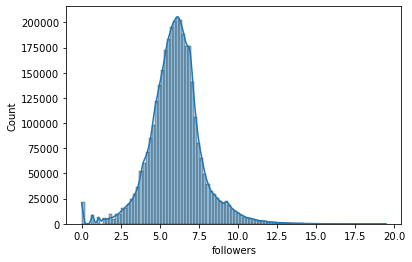

In [85]:
prof_lof = prof['followers'].apply(lambda x: np.log(x+1))
sb.histplot(data=prof_lof, bins=100, kde=True )



### What are histograms, bar plots, scatterplots and pie charts used for?

A **histogram** is an approximate representation of the distribution of numerical data. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. A histogram may also be normalized to display "relative" frequencies showing the proportion of cases that fall into each of several categories , with the sum of the heights equaling 1. The vertical axis is then not the frequency but frequency density —the number of cases per unit of the variable on the horizontal axis. The histograms show the shape of the data. The horizontal axis represents the data values ​​and each bar includes a range of values. The vertical axis indicates how many points in the data have values within the specified range of the bar.
Histograms give a rough sense of the density of the underlying distribution of the data,and often for density estimation : estimating the probability density function of the underlying variable. They are useful for seeing the center, distribution, and shape of a data set. They can also be used as a visual tool for verifying normality.
Histograms are used with continuous data, while **bar plots** are used with categorical or nominal data.  Bar charts are useful for understanding the levels of a variable and can be used to check for errors.The bars can be plotted vertically or horizontally. A vertical bar chart is sometimes called a column chart.One axis of the chart shows the specific categories being compared, and the other axis represents a measured value. Some bar graphs present bars clustered in groups of more than one, showing the values of more than one measured variable.Bar charts have a discrete domain of categories, and are usually scaled so that all the data can fit on the chart. When there is no natural ordering of the categories being compared, bars on the chart may be arranged in any order. Bar charts arranged from highest to lowest incidence are called Pareto charts.

A **scatter plot** is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.A scatter plot can be used either when one continuous variable is under the control of the experimenter and the other depends on it or when both continuous variables are independent. If a parameter exists that is systematically incremented and/or decremented by the other, it is called the control parameter or independent variable and is customarily plotted along the horizontal axis. A scatter plot can suggest various kinds of correlations between variables with a certain confidence interval.f the dots' pattern slopes from lower left to upper right, it indicates a positive correlation between the variables being studied. If the pattern of dots slopes from upper left to lower right, it indicates a negative correlation. 

A **pie chart** is a one-dimension representation used to understand categories proportion on the total frequence. Normally, this chart is accompanied by labels above the proportions that indicate the weight of the categories with respect to the total. It is usefull, in statistics, to represent discrete and continuous data. It has advantages such as the possibility to identify quickly the proportions, but the disadvantage is that this is a one-dimension chart: it's not possible to represent more than one variable on the same chart. another thisadvantage is represented by the fact that, if there are many categories, it could be hard to distinguish them. 

### What insights can you extract from a Box Plot?

A **Box Plot** is a chart that doesn't focus on frequency, but instead on the range of values in the distribution. It highlights the summary metrics that give the distribution its shape. The insights we can extract are:
- The first and the third quantiles, which correspond to the 25th and 75th percentiles;
- The median (50th percentile);
- The interquantile range;
- The minimum value and the maximum value.

# Bonus


### Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

In [79]:
users = pd.read_csv('~/instagram_profiles.csv', delimiter="\t", usecols = ['profile_name', 'followers', 'profile_id','n_posts'])


2880218    285457645.0
2582507     65269440.0
3820939     35339708.0
701965      30689316.0
2414951     30246783.0
              ...     
2862056            0.0
1717625            0.0
944974             0.0
3422872            0.0
1333898            0.0
Name: followers, Length: 3452771, dtype: float64

In [95]:
dataset1 = users.sort_values(['followers'], ascending = False)

In [96]:
dataset1.dropna(inplace=True)

In [110]:
tenperc = int((len(dataset1)*10 )/100)
tenperc

344769

In [112]:
dataset2 = dataset1.head(tenperc)

In [113]:
dataset2

,profile_id,profile_name,followers,n_posts
2880218,2.502532e+07,instagram,285457645.0,5760.0
2582507,3.416684e+06,victoriassecret,65269440.0,7355.0
3820939,2.082449e+07,nba,35339708.0,28816.0
701965,1.876191e+08,louisvuitton,30689316.0,3352.0
2414951,2.125507e+09,buzzfeedtasty,30246783.0,2791.0
...,...,...,...,...
2644333,1.581508e+09,marysopilnyak,2505.0,1143.0
600476,3.507586e+07,gabe.cash,2505.0,137.0
1183256,3.097978e+08,michelle.k.herrera,2505.0,44.0
3045705,1.524120e+07,vortex_surgical,2505.0,161.0


In [118]:
novantaperc = len(dataset1)- tenperc
novantaperc

3102929

In [119]:
dataset3= dataset1.tail(novantaperc)
dataset3

,profile_id,profile_name,followers,n_posts
525350,1.040057e+09,spottedbysue,2505.0,928.0
2227306,8.127065e+09,forever.home.rescue,2505.0,796.0
1779068,3.607100e+07,kaylmorrison,2505.0,972.0
932633,4.871178e+09,hairbytorijohnston,2505.0,279.0
238283,8.005756e+09,dacha_stalina,2504.0,131.0
...,...,...,...,...
2862056,7.551829e+09,jackiesubang29,0.0,0.0
1717625,5.671326e+09,laixiaoi,0.0,5.0
944974,1.149906e+09,yuritag4,0.0,0.0
3422872,3.758606e+09,jaeger_lou,0.0,0.0


dataset 2: contiene il 10% degli utenti con piu followers 

dataset3 : contiene il restante 90%

#### Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

In [ ]:
#profile id , posizione, cts 
#group by profilo e posizione e cts in giorno 


In [94]:
post3 = pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['profile_id', 'location_id', 'cts'], nrows=5000000)
post3

,profile_id,location_id,cts
0,2.237948e+09,1.022366e+15,2017-08-06 20:06:57.000
1,5.579335e+09,4.574268e+14,2017-06-19 09:31:16.000
2,3.134296e+08,4.574268e+14,2017-03-11 20:05:03.000
3,1.837593e+09,4.574268e+14,2016-09-13 16:27:16.000
4,1.131527e+09,4.574268e+14,2015-10-18 10:19:27.000
...,...,...,...
4999995,8.865347e+08,2.434891e+08,2018-11-15 16:35:06.000
4999996,1.819324e+09,2.434891e+08,2018-10-10 12:40:17.000
4999997,6.922242e+09,2.434891e+08,2018-10-07 16:57:41.000
4999998,3.046848e+08,2.434891e+08,2018-10-04 14:09:35.000


In [109]:
post3.cts = pd.to_datetime(post3.cts)
post3.cts

0         2017-08-06 20:06:57
1         2017-06-19 09:31:16
2         2017-03-11 20:05:03
3         2016-09-13 16:27:16
4         2015-10-18 10:19:27
                  ...        
4999995   2018-11-15 16:35:06
4999996   2018-10-10 12:40:17
4999997   2018-10-07 16:57:41
4999998   2018-10-04 14:09:35
4999999   2018-09-15 16:02:55
Name: cts, Length: 5000000, dtype: datetime64[ns]

In [110]:

post4= post3.groupby(by=['profile_id', 'location_id', 'cts'], axis=0).value_counts()
post4

profile_id    location_id   cts                
3.000000e+00  8.030000e+02  2010-08-21 06:40:27    1
              1.444006e+06  2011-05-15 04:33:23    1
              2.166905e+08  2010-09-05 21:48:24    1
              2.435929e+08  2011-10-15 05:12:17    1
              1.029824e+09  2012-11-23 22:30:38    1
                                                  ..
1.466166e+10  2.497724e+08  2019-06-07 09:49:07    1
1.466691e+10  3.776762e+08  2019-06-07 19:41:34    1
9.001013e+13  6.631216e+14  2018-06-30 00:47:29    1
              2.418404e+08  2019-05-13 07:56:01    1
9.001014e+13  1.077310e+06  2019-05-10 03:05:36    1
Length: 4993529, dtype: int64

#### Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

In [138]:
!pip install wordcloud

In [6]:
#from nltk.corpus import stopwords 
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#import cv2

In [7]:
description =  pd.read_csv('~/instagram_posts.csv', delimiter="\t", usecols = ['description'], nrows=10000)
description

,description
0,Wreckloose! Deevalley bike park laps on the @i...
1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...
2,#meraviglia #incensi #the #candele #profumo #a...
3,#teatime #scorpion #friends #love #mountains #...
4,thE sky gavE mE a #constEllation
...,...
9995,Godt med krypinn som dette stedet når kreativi...
9996,"Så flott langs Akerselva, også i snøvær🔷\n.\n...."
9997,NaN
9998,Nytt och vårligt i Oslo


In [9]:
!pip install langdetect
from langdetect import detect


     -------------------------------------- 981.5/981.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=d49a123722ef700eeae58bea369426f36799d077cebd7f7dd96589d963e0136d
  Stored in directory: c:\users\feder\appdata\local\pip\cache\wheels\13\c7\b0\79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [10]:
def detect_en(text): 
    try:
        return detect(text) == 'en'
    except: 
        return False

In [11]:
description['Languagereveiw'] = description[description['description'].apply(detect_en)]

In [12]:
description

,description,Languagereveiw
0,Wreckloose! Deevalley bike park laps on the @i...,Wreckloose! Deevalley bike park laps on the @i...
1,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...,🙌🏼 believe in ya dreams 🙌🏼 just like I believe...
2,#meraviglia #incensi #the #candele #profumo #a...,NaN
3,#teatime #scorpion #friends #love #mountains #...,#teatime #scorpion #friends #love #mountains #...
4,thE sky gavE mE a #constEllation,thE sky gavE mE a #constEllation
...,...,...
9995,Godt med krypinn som dette stedet når kreativi...,NaN
9996,"Så flott langs Akerselva, også i snøvær🔷\n.\n....",NaN
9997,NaN,NaN
9998,Nytt och vårligt i Oslo,NaN


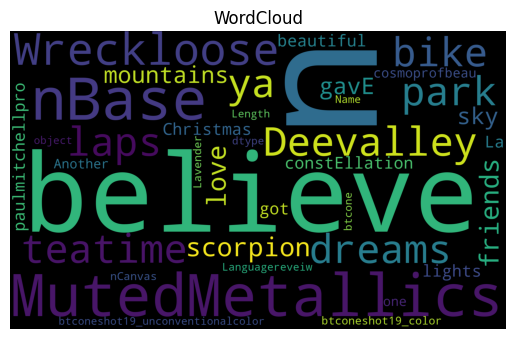

In [33]:
wordcloud2 = WordCloud().generate(str(description['Languagereveiw'].dropna()))
wordcloud2= WordCloud(background_color='black', width=2000, height=1200, max_words=300).generate(str(description['Languagereveiw'].dropna()))
plt.title('WordCloud')
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# Algorithmic Question

In [18]:

def f2(sequence, start, end):
    if start==end:
        for i in range(end): 
            print(sequence[i])
        print("\n")
    else:
        for i in range(start, end):
            temp =sequence[start]
            sequence[start] = sequence[i]
            sequence[i] = temp
            f2(sequence, start+1, end)
            temp= sequence[start]
            sequence[start] = sequence[i]
            sequence[i]  =temp
    

In [19]:
lista = ["a","b","c"]
n  = len(lista)
f2(lista, 0, n)

a
b
c


a
c
b


b
a
c


b
c
a


c
b
a


c
a
b




the following algortimo is used to print the permutations of a set of elements. 
The permutations of a vector of n elements are obtained by calculating the permutations
of the sub-vector of n-1 elements and then exchanging the n-th element with each element of the sub-vector.

Let's take the first element, 'a'. The permutations of a single element are the same element, so it returns to.
Now we take the next element, 'b', and insert it in all possible positions (i.e. only before 'a' and after 'a') for each permutation of 'a', which is only one, therefore:

(b)a

a(b)

And these are the permutations of 'ab'. Now we take 'c', and for every permutation of 'ab' we insert 'c' in every possible position:

(c)ba

b(c)a

ba(c)

(c)ab

a(c)b

ab(c)

**What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?**


The number of permutations of n elements is equal to n!, that is to say : 

n × (n − 1) × (n − 2) × · · · × 2 × 1

For example the permutations on 2 elements are 4, those on 3 elements
there are 6, those on 4 elements are 24, and so on.


The time complexity of the algorithm solution is O(n * n!). Since there are n! permutations for a string of length n, and each permutation takes O (n) times.

#### Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

In [74]:
def permute1(seq):
    if not seq:                               # Shuffle any sequence: list
        return [seq]                          # Empty sequence
    else:
        res = []
        for i in range(len(seq)):
            rest = seq[:i] + seq[i+1:]        # Delete current node
            for x in permute1(rest):          # Permute the others
                res.append(seq[i:i+1] + x)    # Add node at front
        return res
    
    
print(permute1('ABC'))

['ABC', 'ACB', 'BAC', 'BCA', 'CAB', 'CBA']


# AQ2

Given a number n, the task is to break n in such a way that multiplication of its parts is maximized. 

Mathematically, we are given n and we need to maximize a1 * a2 * a3 …. * aK such that n = a1 + a2 + a3 … + aK and a1, a2, … ak > 0.
Note that we need to break given Integer in at least two parts in this problem for maximizing the product.

Now we know from maxima-minima concept that, If an integer need to break in two parts, then to maximize their product those part should be equal. Using this concept lets break n into (n/x) x’s then their product will be x(n/x), now if we take derivative of this product and make that equal to 0 for maxima, we will get to know that value of x should be e (base of the natural logarithm) for maximum product. As we know that 2 < e < 3, so we should break every Integer into 2 or 3 only for maximum product. 
Next thing is 6 = 3 + 3 = 2 + 2 + 2, but 3 * 3 > 2 * 2 * 2, that is every triplet of 2 can be replaced with tuple of 3 for maximum product, so we will keep breaking the number in terms of 3 only, until number remains as 4 or 2, which we will be broken into 2*2 (2*2 > 3*1) and 2 respectively and we will get our maximum product. 
In short, procedure to get maximum product is as follows – Try to break integer in power of 3 only and when integer remains small (<5) then use brute force. 
The complexity of below program is O(log N), because of repeated squaring power method. 

### Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

Example: 
we are given n=4 and we want to know what's the maximum way we can break up 4 and we have to break up into at least two different integers to maximize the product of those integers and then return it.  One way we could break 4 up is to break up into 1 and 3. 
Another way to do it would be to do 2 and 2. The third way is to do is 3 and 1. 
the maximum product of the combo is 4. 
the base case is the integer 1 cause it cannot be broken anymore. 
integerBreak is a root function, dfs it's a recursive function defined inside the root. we're only going to pass the number we're breaking down. 
we gonna have a variable result that is initially set to 0. 
after we create a for loop because we're given a number num and we can break it up into many portions. we use a loop to determine how we're going to break it up. 
if we want the right value of the 2 number results we can take dfs with recursively call on each of the portion so i is the left portion multiplied by dfs of num-i because we want both of the portions to add up to the original which is num. 
we want the max value, so we apply the max function. 
we return result and then we can call dfs passing the original n

In [36]:
def integerBreak1(n):
    def dfs(num):
        if num==1:
            return 1 
        if num==n:
            res=0
        else: 
            res=num
        #res = 0 if num==n else num
        for i in range(1,num):
            val = dfs(i) * dfs(num-i)
            res=max(res,val)
        return res
    return dfs(n)
        

In [27]:
integerBreak1(10)

36

In [38]:
import timeit
import time 
from datetime import datetime 

t = timeit.timeit(lambda : integerBreak1(10) ,number= 1)
print("Running time", "{0:.6f}".format(t), "s")

Running time 0.014114 s


### Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity.

dynamic programming is an algorithm design technique based on dividing the problem into subproblems and using optimal substructures.

In general, a problem with an optimal substructure can be solved using a three-step process:

1. divide the problem into smaller subproblems;
2. solve these problems optimally, using this three-step process recursively;
3. use these optimal solutions to construct an optimal solution to the original problem.

we're going to building from left to right (e.g. 1...n). The case 1 has already been computed so we should start at two and then work our way up until n+1 (n not included).
we initilize dp of num, dp[num] is set to 0 if we are at the root value that we're trying to compute, but id we're not at that value the dp of that value can be at least the number itself. 
i is gonna be one portion, we wanna know for i what's the max product it could be and to get that we can use dp[i] instead of calling dfs because we know it's already been computed. If we're trying to compute tre dp value for 3 we know that dp of 2 and dp of 1 have already been computed. 



In [39]:
def integerBreak(n):
    dp = {1:1}
    for num in range(2, n+1): 
        dp[num] =0 if num ==n else num
        for i in range(1,num):
            val = dp[i] * dp[num-i]
            dp[num] = max(dp[num], val)
    return dp[n]
            
        
        
        
        
    def dfs(num):
        if num==dp:
            return dp[num] 
        dp[num] = 0 if num==n else num
        for i in range(1,num):
            val = dfs(i) * dfs(num-i)
            dp[num]=max(dp[num],val)
        return dp[num] 
    return dfs(n)
        

In [98]:
integerBreak(10)

36

In [40]:
import timeit
import time 
from datetime import datetime 

t = timeit.timeit(lambda : integerBreak(10) ,number= 1)
print("Running time", "{0:.6f}".format(t), "s")

Running time 0.000085 s


We note that the execution time is significantly lower

### Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them).

tempo esecuzione 0.000010 s 2
tempo esecuzione 0.000011 s 3
tempo esecuzione 0.000013 s 4
tempo esecuzione 0.000015 s 5
tempo esecuzione 0.000016 s 6
tempo esecuzione 0.000022 s 7
tempo esecuzione 0.000024 s 8
tempo esecuzione 0.000028 s 9
tempo esecuzione 0.000032 s 10
tempo esecuzione 0.000040 s 11
tempo esecuzione 0.000044 s 12
tempo esecuzione 0.000052 s 13
tempo esecuzione 0.000059 s 14
tempo esecuzione 0.000067 s 15
tempo esecuzione 0.000087 s 16
tempo esecuzione 0.000090 s 17
tempo esecuzione 0.000098 s 18
tempo esecuzione 0.000125 s 19
tempo esecuzione 0.000139 s 20
tempo esecuzione 0.000126 s 21
tempo esecuzione 0.000137 s 22
tempo esecuzione 0.000140 s 23
tempo esecuzione 0.000151 s 24
tempo esecuzione 0.000164 s 25
24


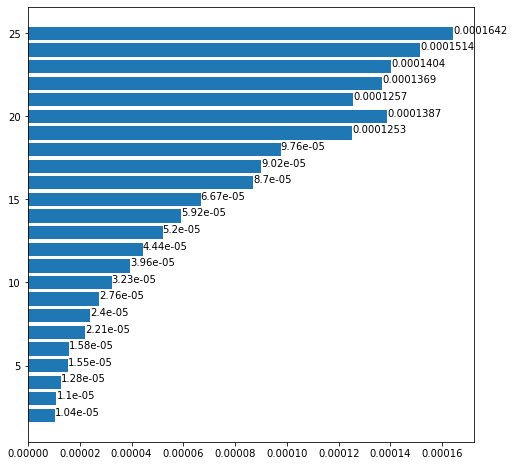

In [100]:
import os
import numpy as np
import matplotlib.pyplot as plt

lst=[]
for n in range(2,26):
    t = timeit.timeit(lambda : integerBreak(n) ,number= 1)
    print("tempo esecuzione", "{0:.6f}".format(t), "s", n)
    lst.append(t)
    
print(len(lst))
x=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

fig = plt.gcf()
fig.set_size_inches(8, 8, forward=True)
plt.barh(x, lst)

for index, value in enumerate(lst): 
    plt.text(value, index+2, str(round(value,6)))

plt.show()


TEMPO DI ESECUZIONE SECONDO ALGORITMO -- PD
tempo esecuzione 0.000009 s 2
tempo esecuzione 0.000009 s 3
tempo esecuzione 0.000010 s 4
tempo esecuzione 0.000014 s 5
tempo esecuzione 0.000015 s 6
tempo esecuzione 0.000024 s 7
tempo esecuzione 0.000023 s 8
tempo esecuzione 0.000026 s 9
tempo esecuzione 0.000031 s 10
tempo esecuzione 0.000037 s 11
tempo esecuzione 0.000086 s 12
tempo esecuzione 0.000083 s 13
tempo esecuzione 0.000059 s 14
tempo esecuzione 0.000069 s 15
tempo esecuzione 0.000072 s 16
tempo esecuzione 0.000078 s 17
tempo esecuzione 0.000088 s 18
tempo esecuzione 0.000097 s 19
tempo esecuzione 0.000094 s 20
tempo esecuzione 0.000105 s 21
tempo esecuzione 0.000112 s 22
tempo esecuzione 0.000124 s 23
tempo esecuzione 0.000129 s 24
tempo esecuzione 0.000145 s 25


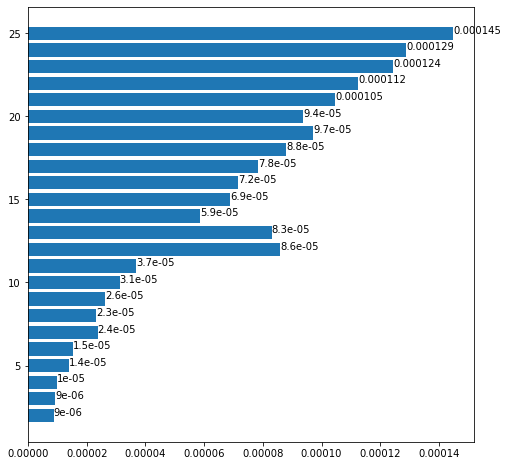

In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt
print("TEMPO DI ESECUZIONE SECONDO ALGORITMO -- PD")
lst=[]
for n in range(2,26):
    t = timeit.timeit(lambda : integerBreak(n) ,number= 1)
    print("tempo esecuzione", "{0:.6f}".format(t), "s", n)
    lst.append(t)



x= list(range(2,25+1))
fig = plt.gcf()
fig.set_size_inches(8, 8, forward=True)
plt.barh(x, lst)
for index, value in enumerate(lst): 
    plt.text(value, index+2, str(round(value,6)))

plt.show()



In [41]:
print("RUNNING TIME FIRST ALGORITHM")
lst2=[]
for n in range(2,26):
    t = timeit.timeit(lambda : integerBreak1(n) ,number= 1)
    print("Running time", "{0:.6f}".format(t), "s", n)
    lst2.append(t)


RUNNING TIME FIRST ALGORITHM
Running time 0.000015 s 2
Running time 0.000017 s 3
Running time 0.000031 s 4
Running time 0.000082 s 5
Running time 0.000227 s 6
Running time 0.000697 s 7
Running time 0.001883 s 8
Running time 0.005022 s 9
Running time 0.014477 s 10
Running time 0.047512 s 11
Running time 0.141593 s 12
Running time 0.402218 s 13
Running time 1.188505 s 14
Running time 3.349321 s 15
Running time 10.200515 s 16
Running time 31.043483 s 17
Running time 89.226298 s 18
Running time 214.919879 s 19
Running time 675.472484 s 20
Running time 2027.306671 s 21


KeyboardInterrupt: 

Due to exponential complexity it needed too much time to run up to 25, so we had to interrupt from the Kyeboard. 

In [45]:
print("RUNNING TIME FIRST ALGORITHM")
lst3=[]
for n in range(2,15):
    t = timeit.timeit(lambda : integerBreak1(n) ,number= 1)
    print("Running time", "{0:.6f}".format(t), "s", n)
    lst3.append(t)

RUNNING TIME FIRST ALGORITHM
Running time 0.000015 s 2
Running time 0.000019 s 3
Running time 0.000047 s 4
Running time 0.000088 s 5
Running time 0.000257 s 6
Running time 0.000903 s 7
Running time 0.002682 s 8
Running time 0.013598 s 9
Running time 0.025416 s 10
Running time 0.065654 s 11
Running time 0.124585 s 12
Running time 0.451179 s 13
Running time 1.266920 s 14


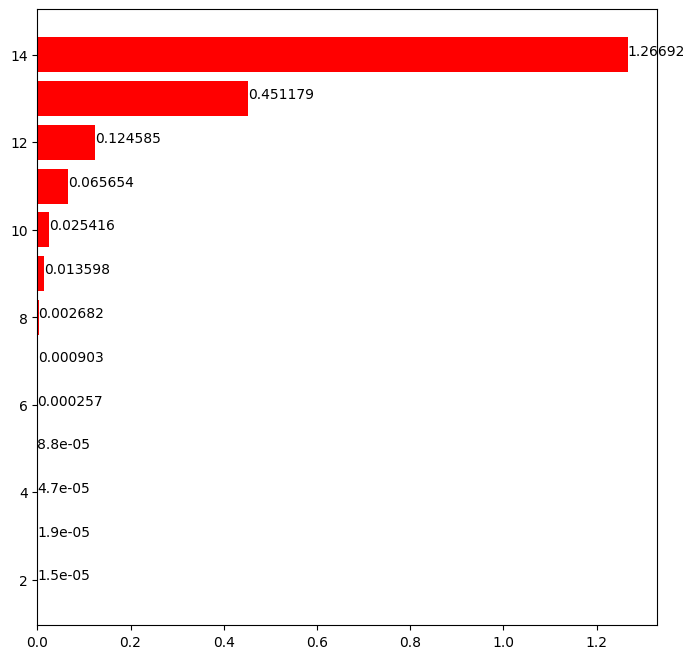

In [46]:
x= list(range(2,14+1))
fig = plt.gcf()
fig.set_size_inches(8, 8, forward=True)
plt.barh(x, lst3, color = "red")
for index, value in enumerate(lst3): 
    plt.text(value, index+2, str(round(value,6)))

plt.show()